<a href="https://colab.research.google.com/github/Baishnab1234/ML-projects/blob/main/ML_LESSON_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 06.06.2021

Author:[Baishnab Parida](https://github.com/Baishnab1234/MLnow_Girlscript)

In [ ]:
cd'/content/drive/MyDrive/Colab Notebooks/EDA FILE'

/content/drive/MyDrive/Colab Notebooks/EDA FILE


In [ ]:
ls

cleanedMathData.CSV  student-merge.R  student.txt
student-mat.csv      student-por.csv


In [ ]:
import os

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os


In [ ]:
mathData=pd.read_csv('student-mat.csv',sep=';')

In [ ]:
mathData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [ ]:
unimathData=mathData[['G1','G3']]
unimathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [ ]:
unimathData.to_csv('univariate_mathData_2.csv')

In [ ]:
ls

cleanedMathData.CSV  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_mathData_2.csv


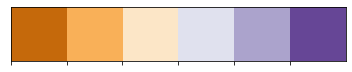

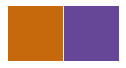

In [13]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))
pal=sns.color_palette('PuOr',6)
pal.as_hex()
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697']
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [14]:
unimathData.columns

Index(['G1', 'G3'], dtype='object')

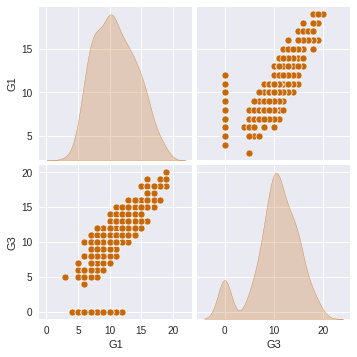

In [16]:
sns.pairplot(unimathData,
x_vars=['G1','G3'],
y_vars=['G1','G3'],
diag_kind='kde'
)

In [17]:
trainDataset=unimathData.sample(frac=0.8,random_state=0)
testDataset=unimathData.drop(trainDataset.index)
print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [20]:
trainFeatures=trainDataset.copy()
testFeatures=testDataset.copy()
print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [18]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [21]:
trainLabels=trainFeatures.pop('G3')
testLabels=testFeatures.pop('G3')
print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [22]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [24]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [28]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae','mse'])

In [30]:
numEpochs=500
history=model.fit(x=trainFeatures,y=trainLabels,validation_data=(testFeatures,testLabels),epochs=numEpochs)

Epoch 1/500
10/10 [==============================] - 0s 8ms/step - loss: 1.8999 - mae: 1.8999 - mse: 8.8311 - val_loss: 1.6382 - val_mae: 1.6382 - val_mse: 6.7999
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8999 - mae: 1.8999 - mse: 8.8370 - val_loss: 1.6403 - val_mae: 1.6403 - val_mse: 6.8086
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8996 - mae: 1.8996 - mse: 8.8384 - val_loss: 1.6402 - val_mae: 1.6402 - val_mse: 6.8077
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8995 - mae: 1.8995 - mse: 8.8386 - val_loss: 1.6405 - val_mae: 1.6405 - val_mse: 6.8085
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8996 - mae: 1.8996 - mse: 8.8399 - val_loss: 1.6401 - val_mae: 1.6401 - val_mse: 6.8066
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8994 - mae: 1.8994 - mse: 8.8377 - val_loss: 1.6398 - val_mae: 1.6398 - val_mse: 6.8053
Epoch 7/500
10/10 [===

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
def plotGraphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Num of Epochs')
  plt.ylabel('string')
  plt.legend([string,f'val_{string}'])
  plt.show()
  plotGraphs(history,'loss')
  plotGraphs(history,'mae')
  

In [38]:
testPreds=model.predict(testFeatures).flatten()

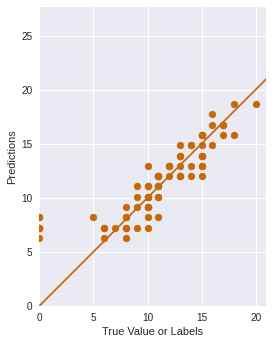

In [41]:
def predPlot(labels,predictions):
    plt.scatter(labels,predictions)
    plt.ylabel('Predictions')
    plt.xlabel('True Value or Labels')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]]) 
    plt.plot([-100,100],[-100,100])
    plt.show()

predPlot(testLabels,testPreds)

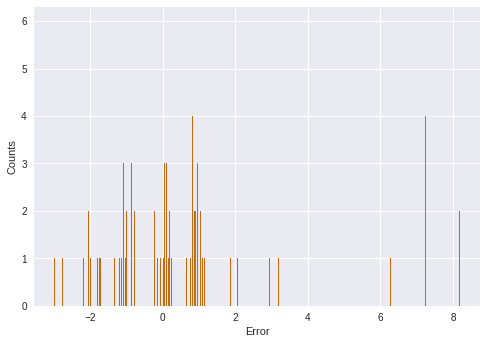

In [44]:
def errorPlot(preds,labels,counts):
    errors=preds-labels
    plt.hist(errors,counts)
    plt.xlabel('Error')
    plt.ylabel('Counts')
    plt.show()

errorPlot(testPreds,testLabels,numEpochs)